In [1]:
# import necessary libs
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso, ElasticNet

# Business Understanding
The purpose of this project is to analyze Los Angeles hooms and rooms listings in Airbnb to:
* Predict the price, 
* Understand the features that derive the price
* Know when it is the busiest in Los Angeles


# Data Understanding
Datasets found in this notebook are provided and available through Airbnb Data center.

There are two files that I will be working on. The first one is 'listings 2.csv' which containes information about the listings such as location, number of beds and price. The other file is 'calender 2.cvs' which contains information about the daily availability of each listing.

## Understanding the 'listings' data
Let's load the data and check the number of columns and the name of each one

In [2]:
# Loading the listing data
listings = pd.read_csv('../data/listings 2.csv')

#print the number of rows and columns
print(listings.shape)

print("Listings columns")
print(listings.columns.values)

(39821, 96)
Listings columns
['id' 'listing_url' 'scrape_id' 'last_scraped' 'name' 'summary' 'space'
 'description' 'experiences_offered' 'neighborhood_overview' 'notes'
 'transit' 'access' 'interaction' 'house_rules' 'thumbnail_url'
 'medium_url' 'picture_url' 'xl_picture_url' 'host_id' 'host_url'
 'host_name' 'host_since' 'host_location' 'host_about'
 'host_response_time' 'host_response_rate' 'host_acceptance_rate'
 'host_is_superhost' 'host_thumbnail_url' 'host_picture_url'
 'host_neighbourhood' 'host_listings_count' 'host_total_listings_count'
 'host_verifications' 'host_has_profile_pic' 'host_identity_verified'
 'street' 'neighbourhood' 'neighbourhood_cleansed'
 'neighbourhood_group_cleansed' 'city' 'state' 'zipcode' 'market'
 'smart_location' 'country_code' 'country' 'latitude' 'longitude'
 'is_location_exact' 'property_type' 'room_type' 'accommodates'
 'bathrooms' 'bedrooms' 'beds' 'bed_type' 'amenities' 'square_feet'
 'price' 'weekly_price' 'monthly_price' 'security_deposit' 'c

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3044: DtypeWarning: Columns (43) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


There are 96 columns and 39821 rows. Let's check the first 5 rows.

In [3]:
listings.head(5)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,109,https://www.airbnb.com/rooms/109,20180509214934,2018-05-10,Amazing bright elegant condo park front *UPGRA...,"*** Unit upgraded with new bamboo flooring, br...","*** Unit upgraded with new bamboo flooring, br...","*** Unit upgraded with new bamboo flooring, br...",none,NaN,...,f,NaN,NaN,f,f,strict_14_with_grace_period,t,f,1,0.02
1,344,https://www.airbnb.com/rooms/344,20180509214934,2018-05-10,Family perfect;Pool;Near Studios!,This home is perfect for families; aspiring ch...,"Cheerful & comfortable; near studios, amusemen...",This home is perfect for families; aspiring ch...,none,Quiet-yet-close to all the fun in LA! Hollywoo...,...,f,NaN,NaN,t,f,flexible,f,f,1,0.04
2,2404,https://www.airbnb.com/rooms/2404,20180509214934,2018-05-10,deleted,NaN,deleted,deleted,none,NaN,...,f,NaN,"{""City of Los Angeles"","" CA""}",f,f,moderate,f,f,1,NaN
3,2732,https://www.airbnb.com/rooms/2732,20180509214934,2018-05-11,Zen Life at the Beach,NaN,This is a three story townhouse with the follo...,This is a three story townhouse with the follo...,none,NaN,...,t,NaN,"{""Santa Monica""}",f,f,strict_14_with_grace_period,f,f,2,0.20
4,2864,https://www.airbnb.com/rooms/2864,20180509214934,2018-05-10,*Upscale Professional Home with Beautiful Studio*,Centrally located.... Furnished with 42 inch S...,The space is furnished with Thomasville furnit...,Centrally located.... Furnished with 42 inch S...,none,What makes the neighborhood unique is that the...,...,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,2,NaN


There are 96 columns/features that describe each listing. While some of them are meaningful, others are redundunt.
To understand the data more, the mean and standard deviation can tell a lot about the data.

In [4]:
listings.describe()

,id,scrape_id,thumbnail_url,medium_url,xl_picture_url,host_id,host_acceptance_rate,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
count,3.982100e+04,3.982100e+04,0.0,0.0,0.0,3.982100e+04,0.0,39762.000000,39762.000000,0.0,...,39821.000000,30590.000000,30541.000000,30548.000000,30493.000000,30539.000000,30481.000000,30473.000000,39821.000000,31178.000000
mean,1.506239e+07,2.018051e+13,NaN,NaN,NaN,5.275763e+07,NaN,7.332604,7.332604,NaN,...,25.130785,94.431808,9.631741,9.443008,9.775129,9.764694,9.647649,9.503528,4.924663,1.876860
std,7.318457e+06,5.367255e+00,NaN,NaN,NaN,5.251971e+07,NaN,33.406735,33.406735,NaN,...,46.483322,8.414829,0.823985,0.965774,0.703225,0.721231,0.737889,0.862986,11.528797,2.237863
min,1.090000e+02,2.018051e+13,NaN,NaN,NaN,5.900000e+01,NaN,0.000000,0.000000,NaN,...,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.010000
25%,9.151248e+06,2.018051e+13,NaN,NaN,NaN,9.376458e+06,NaN,1.000000,1.000000,NaN,...,1.000000,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,1.000000,0.390000
50%,1.657347e+07,2.018051e+13,NaN,NaN,NaN,3.278914e+07,NaN,2.000000,2.000000,NaN,...,6.000000,97.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2.000000,1.100000
75%,2.143556e+07,2.018051e+13,NaN,NaN,NaN,8.496351e+07,NaN,4.000000,4.000000,NaN,...,28.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000,2.740000
max,2.496704e+07,2.018051e+13,NaN,NaN,NaN,1.886280e+08,NaN,1124.000000,1124.000000,NaN,...,699.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,145.000000,88.000000


Looks like the data has many different data types and some missings data points.

## Understanding the 'calendar' data
Let's load the data and check the number of columns and the name of each one

In [5]:
# Loading the listing data
calendar = pd.read_csv('../data/calendar 2.csv')

#print the number of rows and columns
print(calendar.shape)

print("Listings columns")
print(calendar.columns.values)

(14534665, 4)
Listings columns
['listing_id' 'date' 'available' 'price']


There are 14534665 rows and 4 columns. Let's check the first 5 rows.

In [6]:
calendar.head(5)

,listing_id,date,available,price
0,3295878,2019-02-23,t,$95.00
1,3295878,2019-02-22,t,$95.00
2,3295878,2019-02-21,t,$95.00
3,3295878,2019-02-20,t,$95.00
4,3295878,2019-02-19,t,$95.00


Looks like that the availability of each listing is reported on daily basis. To understand the data more, the mean and standard deviation can tell a lot about the data.

In [7]:
calendar.describe()

,listing_id
count,1.453466e+07
mean,1.506239e+07
std,7.318365e+06
min,1.090000e+02
25%,9.151248e+06
50%,1.657347e+07
75%,2.143556e+07
max,2.496704e+07


Similar to listings data, calendar data has different data types and some missings data points.

### Data Cleaning

#### Clean 'listings' Data
First, I collected all the columns that have more than 35% missing values to see if they can be engineered. If not, I will drop them.

In [8]:
columns_to_remove = [cols for cols in listings.columns.values if (listings[cols].isnull().sum()/len(listings))>=0.35]
columns_to_remove

['neighborhood_overview',
 'notes',
 'transit',
 'access',
 'interaction',
 'thumbnail_url',
 'medium_url',
 'xl_picture_url',
 'host_about',
 'host_acceptance_rate',
 'neighbourhood_group_cleansed',
 'square_feet',
 'weekly_price',
 'monthly_price',
 'license']

In [9]:
# print column name along with sample of the data
for col in columns_to_remove:
    print (col)
    print(listings[col].head())

neighborhood_overview
0                                                  NaN
1    Quiet-yet-close to all the fun in LA! Hollywoo...
2                                                  NaN
3                                                  NaN
4    What makes the neighborhood unique is that the...
Name: neighborhood_overview, dtype: object
notes
0                                                  NaN
1    One dog may be on premises, friendly and cared...
2                                                  NaN
3                                                  NaN
4    If you are doing business travel, this studio ...
Name: notes, dtype: object
transit
0                                                  NaN
1    Short drive to subway and elevated trains runn...
2                                                  NaN
3                                                  NaN
4    Public transportation is a 3 minutes walk to t...
Name: transit, dtype: object
access
0                                

The data is mostly null or plain text which is hard to transform to categories. Hence, I dropped those columns.

In [10]:
listings.drop(columns=columns_to_remove,inplace=True)


Next, I wanted to check the data type and transform all non-numeric data to numeric one.

In [11]:
listings.dtypes.value_counts()

object     53
float64    15
int64      13
dtype: int64

There are 53 non-numeric data. Let's have a look and see if it can be encoded

In [12]:
# getting all columns with 'object' data type
non_numerical_columns = [cols for cols in listings.columns.values if (listings[cols].dtype == 'object')]

# print column with sample data 
for col in non_numerical_columns:
    print(col)
    print(listings[col].head())

listing_url
0     https://www.airbnb.com/rooms/109
1     https://www.airbnb.com/rooms/344
2    https://www.airbnb.com/rooms/2404
3    https://www.airbnb.com/rooms/2732
4    https://www.airbnb.com/rooms/2864
Name: listing_url, dtype: object
last_scraped
0    2018-05-10
1    2018-05-10
2    2018-05-10
3    2018-05-11
4    2018-05-10
Name: last_scraped, dtype: object
name
0    Amazing bright elegant condo park front *UPGRA...
1                    Family perfect;Pool;Near Studios!
2                                              deleted
3                                Zen Life at the Beach
4    *Upscale Professional Home with Beautiful Studio*
Name: name, dtype: object
summary
0    *** Unit upgraded with new bamboo flooring, br...
1    This home is perfect for families; aspiring ch...
2                                                  NaN
3                                                  NaN
4    Centrally located.... Furnished with 42 inch S...
Name: summary, dtype: object
space
0    *** 

After looking at samples of 'object' columns, I decided to only focus on the ones that can be cleaned easily. To see if the data in each column is good, I checked the number of unique values and the distribution of the data.

In [13]:
non_numerical_more_analysis_columns = ['experiences_offered','host_since','host_response_rate','host_is_superhost',
                                        'host_has_profile_pic','host_identity_verified','property_type',
                                        'room_type','bed_type','amenities','price','security_deposit','cleaning_fee',
                                        'extra_people','requires_license','instant_bookable','cancellation_policy']
for col in non_numerical_more_analysis_columns:
    print(col)
    print(listings[col].describe())

experiences_offered
count     39821
unique        1
top        none
freq      39821
Name: experiences_offered, dtype: object
host_since
count          39762
unique          2968
top       2017-05-10
freq             156
Name: host_since, dtype: object
host_response_rate
count     31945
unique       70
top        100%
freq      24420
Name: host_response_rate, dtype: object
host_is_superhost
count     39762
unique        2
top           f
freq      29695
Name: host_is_superhost, dtype: object
host_has_profile_pic
count     39762
unique        2
top           t
freq      39656
Name: host_has_profile_pic, dtype: object
host_identity_verified
count     39762
unique        2
top           t
freq      21170
Name: host_identity_verified, dtype: object
property_type
count         39821
unique           40
top       Apartment
freq          15708
Name: property_type, dtype: object
room_type
count               39821
unique                  3
top       Entire home/apt
freq                23964
Nam

In [14]:
# the column 'experiences_offered' has only one value which doesn't make any sense to include it in the data
non_numerical_more_analysis_columns.remove('experiences_offered')

# the column 'host_since' has too many different values which might lead to overfetting. I decided to remove it
non_numerical_more_analysis_columns.remove('host_since')

# the column 'host_has_profile_pic' has two values where one is dominant so I decided to remove it
non_numerical_more_analysis_columns.remove('host_has_profile_pic')

# the column 'property_type' has 42 different values. It looks logically wrong as there might be typos 
# in some data points. I decided to remove this column
non_numerical_more_analysis_columns.remove('property_type')

# the column 'bed_type' has 5 values where one is dominant so I decided to remove it
non_numerical_more_analysis_columns.remove('bed_type')

# the column 'amenities' containes list of data that need to be decoded and cleaned.
# Since the number of ameneities might be high, I decided to remove this column
non_numerical_more_analysis_columns.remove('amenities')

# the column 'host_has_profile_pic' has two values where one is dominant so I decided to remove it
non_numerical_more_analysis_columns.remove('requires_license')

non_numerical_more_analysis_columns

['host_response_rate',
 'host_is_superhost',
 'host_identity_verified',
 'room_type',
 'price',
 'security_deposit',
 'cleaning_fee',
 'extra_people',
 'instant_bookable',
 'cancellation_policy']

The 'host_response_rate' is a percentage which needs to be replaced to a float number

In [15]:
listings['host_response_rate'] = listings['host_response_rate'].replace( '%','', regex=True ).astype(float)

In [16]:
listings['host_response_rate'].describe()

count    31945.000000
mean        95.003036
std         15.717577
min          0.000000
25%        100.000000
50%        100.000000
75%        100.000000
max        100.000000
Name: host_response_rate, dtype: float64

The columns 'host_is_superhost', 'host_identity_verified', and 'instant_bookable' contains binary values (t,f). They needs to be encoded so that 't' will be 1 and 'f' will be 0 

In [17]:
true_false_columns = ['host_is_superhost' , 'host_identity_verified','instant_bookable']
listings[true_false_columns] = np.where(listings[true_false_columns]=='t', 1, 0)

The columns 'price', 'security_deposit' , 'cleaning_fee', and 'extra_people' are all contains doller sign followed by a number. The doller sign must be removed and then the number must be converted into a float number

In [18]:
doller_columns = ['price', 'security_deposit' , 'cleaning_fee', 'extra_people']
listings[doller_columns] = listings[doller_columns].replace('[\$,]', '', regex=True).astype(float)

The columns 'room_type' and 'cancellation_policy' contains many values which need to be encoded using pd.get_dummies method

In [19]:
columns_to_encode = ['room_type' , 'cancellation_policy' ] 
listings=pd.get_dummies(data=listings, columns=columns_to_encode,drop_first=True)

Keep the encoded columns and drop the rest

In [20]:
columns_to_delete = new_list = [col for col in non_numerical_columns if col not in non_numerical_more_analysis_columns]
listings.drop(columns=columns_to_delete,inplace=True, axis=1)

Next, Find out about the missing values and try to fill them

In [21]:
(listings.isnull().sum()/len(listings)).sort_values(ascending=False)

security_deposit                                   0.305316
review_scores_value                                0.234751
review_scores_location                             0.234550
review_scores_checkin                              0.234248
review_scores_communication                        0.233093
review_scores_accuracy                             0.233043
review_scores_cleanliness                          0.232867
review_scores_rating                               0.231812
reviews_per_month                                  0.217046
host_response_rate                                 0.197785
cleaning_fee                                       0.174179
host_total_listings_count                          0.001482
host_listings_count                                0.001482
beds                                               0.001105
bathrooms                                          0.001105
bedrooms                                           0.000552
accommodates                            

In [22]:
listings['security_deposit'].describe()

count    27663.000000
mean       386.918158
std        730.940200
min          0.000000
25%        100.000000
50%        200.000000
75%        400.000000
max       5100.000000
Name: security_deposit, dtype: float64

I assuemed that some listings will not have a security deposit. Hence, I filled the missing values with zero

In [23]:
listings['security_deposit'] = listings['security_deposit'].fillna(0)

Next, There are 8 columns that related to review scores. Missing value in one might lead to inaccurate ovreall review score. So I decided to drop those columns

In [24]:
review_columns = ['review_scores_value' , 'review_scores_location', 'review_scores_checkin', 
                  'review_scores_communication', 'review_scores_accuracy', 'review_scores_cleanliness',
                  'review_scores_rating', 'reviews_per_month']
listings.drop(columns=review_columns,inplace=True, axis=1)

In [25]:
listings['host_response_rate'].describe()

count    31945.000000
mean        95.003036
std         15.717577
min          0.000000
25%        100.000000
50%        100.000000
75%        100.000000
max        100.000000
Name: host_response_rate, dtype: float64

It looks like that must of the data are within a small range. Dropping the column is the way to go!

In [26]:
listings.drop(columns='host_response_rate',inplace=True, axis=1)

In [27]:
listings['cleaning_fee'].describe()

count    32885.000000
mean        79.957184
std         86.145460
min          0.000000
25%         30.000000
50%         60.000000
75%        100.000000
max       1500.000000
Name: cleaning_fee, dtype: float64

I assuemed that some listings will not have a cleaning fee. Hence, I filled the missing values with zero

In [28]:
listings['cleaning_fee'] = listings['cleaning_fee'].fillna(0)

In [29]:
listings['beds'].describe()

count    39777.000000
mean         1.988712
std          1.700394
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         50.000000
Name: beds, dtype: float64

Since the data looks normally distributed, I filled the missing values with the mean

In [30]:
listings['beds'] = listings['beds'].fillna(listings['beds'].mean())

In [31]:
listings['bathrooms'].describe()

count    39777.000000
mean         1.429105
std          0.929977
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         22.000000
Name: bathrooms, dtype: float64

Since the data looks normally distributed, I filled the missing values with the mean

In [32]:
listings['bathrooms'] = listings['bathrooms'].fillna(listings['bathrooms'].mean())

In [33]:
listings['bedrooms'].describe()

count    39799.000000
mean         1.396065
std          1.124425
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         50.000000
Name: bedrooms, dtype: float64

Since the data looks normally distributed, I filled the missing values with the mean

In [34]:
listings['bedrooms'] = listings['bedrooms'].fillna(listings['bedrooms'].mean())

In [35]:
listings['host_listings_count'].describe()

count    39762.000000
mean         7.332604
std         33.406735
min          0.000000
25%          1.000000
50%          2.000000
75%          4.000000
max       1124.000000
Name: host_listings_count, dtype: float64

It looks like there are outliers that made the mean to be high. Since most of the data is between 0 and 6, I will fill the missing with the value 3.5

In [36]:
listings['host_listings_count'] = listings['host_listings_count'].fillna(3.5)

In [37]:
listings['host_total_listings_count'].describe()

count    39762.000000
mean         7.332604
std         33.406735
min          0.000000
25%          1.000000
50%          2.000000
75%          4.000000
max       1124.000000
Name: host_total_listings_count, dtype: float64

It looks like there are outliers that made the mean to be high. Since most of the data is between 0 and 6, I will fill the missing with the value 3.5

In [38]:
listings['host_total_listings_count'] = listings['host_total_listings_count'].fillna(3.5)

In [39]:
(listings.isnull().sum()/len(listings)).sort_values(ascending=False)

cancellation_policy_super_strict_60                0.0
longitude                                          0.0
security_deposit                                   0.0
price                                              0.0
beds                                               0.0
bedrooms                                           0.0
bathrooms                                          0.0
accommodates                                       0.0
latitude                                           0.0
cancellation_policy_super_strict_30                0.0
host_identity_verified                             0.0
host_total_listings_count                          0.0
host_listings_count                                0.0
host_is_superhost                                  0.0
host_id                                            0.0
scrape_id                                          0.0
cleaning_fee                                       0.0
guests_included                                    0.0
extra_peop

I will drop the id, scrape_id, and host_id as they aren't relevent

In [40]:
listings.drop(columns=['id','scrape_id','host_id'],inplace=True, axis=1)

Next, looking at the price data to see if there is outliers

In [41]:
listings['price'].describe()

count    39821.000000
mean       197.202682
std        477.834477
min          0.000000
25%         69.000000
50%        100.000000
75%        179.000000
max      25000.000000
Name: price, dtype: float64

In [42]:
def plot_price(listings, price_limit):
    """
    The function to plot a bar chart of the price column 
  
    Parameters: 
        listings: The whole dataframe.
        price_limit: The maximum number to include in the graph.        
        
    """
    listings = listings[listings['price']<price_limit]
    fig, ax = plt.subplots()
    counts, bins, patches = ax.hist(listings['price'])
    ax.set_xticks(bins)
    plt.show()

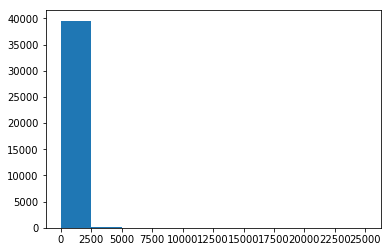

In [43]:
plot_price(listings, len(listings['price']))

As we can see from the graph above, must of the data in the range between 0 and 2500. I will remove any row with price value larger than 2500 and repeate the same process

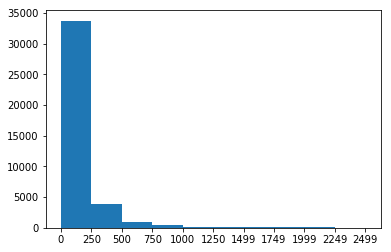

In [44]:
plot_price(listings, 2500)

As we can see from the graph above, must of the data in the range between 0 and 500. I will remove any row with price value larger than 500 and repeate the same process

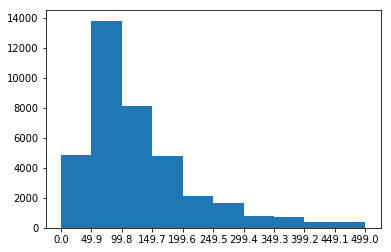

In [45]:
plot_price(listings, 500)

Finally we have a clean data

In [46]:
# Print the list of columns
listings.columns

Index(['host_is_superhost', 'host_listings_count', 'host_total_listings_count',
       'host_identity_verified', 'latitude', 'longitude', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'price', 'security_deposit',
       'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights',
       'maximum_nights', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'number_of_reviews',
       'instant_bookable', 'calculated_host_listings_count',
       'room_type_Private room', 'room_type_Shared room',
       'cancellation_policy_moderate', 'cancellation_policy_strict',
       'cancellation_policy_strict_14_with_grace_period',
       'cancellation_policy_super_strict_30',
       'cancellation_policy_super_strict_60'],
      dtype='object')

#### Clean 'calendar' Data
First, let's see how many missing values in the data

In [47]:
calendar.isnull().sum()

listing_id          0
date                0
available           0
price         7810820
dtype: int64

Looks like the price column has too many missing values. I will drop it.

In [48]:
calendar.drop(['price'], axis=1, inplace=True)

Since the data has a column for the availability, I assuemed that if the listing is not available in a given day, then it has been rented. As the number of unavailable listings getting high, the bussier it is.

In [49]:
unavailable_calendar = calendar[calendar['available'] == 'f']
unavailable_calendar.head(5)

,listing_id,date,available
365,18511883,2019-05-09,f
366,18511883,2019-05-08,f
367,18511883,2019-05-07,f
368,18511883,2019-05-06,f
369,18511883,2019-05-05,f


# Modeling and Results

# Question 1: Can we predict the price?
To answer this question, building a machine learning model is the way to go.
Since I'm interested in predicting the price, I set 'price' as the target and the rest as features

In [50]:
target = listings['price']
features = listings.drop(columns=['price'],axis=1)

Split the data into train and test sets with 20% as test

In [51]:
X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    target, 
                                                    test_size=0.20, 
                                                    random_state=50)

Normalize the data

In [52]:
#fit and transform training data
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)

#transform test data
X_test=scaler.transform(X_test)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  


Next, I tried different models to predict the price and calculated the error. The model with the best error will be used later with optimaized parameters

In [53]:
def train_predict(models, X_train, y_train):
    """
    The function loop through list of models and fit the training set
    then it prints the r2 score.
  
    Parameters: 
        models (list): The list of models.
        X_train: Features training set.
        y_train: Target training set.
        
        
    """
    for model in models:
        print("Train using: " , model.__class__.__name__)
        model.fit(X_train,y_train)
        test_predict = model.predict(X_test)
        train_predict = model.predict(X_train)
        print("r2 score for train: ",r2_score(y_train,train_predict))
        print("r2 score for test: ",r2_score(y_test,test_predict))

In [54]:
models = []
models.append(LinearRegression())
models.append(DecisionTreeRegressor())
models.append(RandomForestRegressor())
models.append(SVR())
models.append(Lasso())
models.append(ElasticNet())
models.append(GradientBoostingRegressor())
models.append(AdaBoostRegressor())
train_predict(models, X_train, y_train)

Train using:  LinearRegression
r2 score for train:  0.3903341155070782
r2 score for test:  0.4881359695311025
Train using:  DecisionTreeRegressor
r2 score for train:  1.0
r2 score for test:  -0.09977767142988991
Train using:  RandomForestRegressor


/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


r2 score for train:  0.9045133010500318
r2 score for test:  0.5532057351196966
Train using:  SVR
r2 score for train:  0.08497536473627854
r2 score for test:  0.13322865989316723
Train using:  Lasso
r2 score for train:  0.3901577782570911
r2 score for test:  0.48873954858076585
Train using:  ElasticNet
r2 score for train:  0.3713252185056194
r2 score for test:  0.47762657458224855
Train using:  GradientBoostingRegressor
r2 score for train:  0.7075161622473735
r2 score for test:  0.6462659265715615
Train using:  AdaBoostRegressor
r2 score for train:  -0.4993770341356307
r2 score for test:  -1.2556471704863617


I will focus on GradientBoostingRegressor and RandomForestRegressor

In [55]:
def tune_parameters(model, parameters, X_train, y_train):
    grid_search = GridSearchCV(model, parameters, scoring = 'r2', return_train_score=True, verbose=3)
    grid_search.fit(X_train, y_train)
    print(grid_search.best_params_)

    train_predict = grid_search.predict(X_train)
    test_predict = grid_search.predict(X_test)

    print("r2 score for train: ",r2_score(y_train,train_predict))
    print("r2 score for test: ",r2_score(y_test,test_predict))
    
    return grid_search

In [57]:
rfr_model = RandomForestRegressor(random_state = 50)
#parameters = {'max_depth': [20, 30, None],
#                 'min_samples_leaf': [2, 4],
#                 'n_estimators': [200, 400]
#             }

parameters = {'max_depth': [None],
              'min_samples_leaf':[2], 
              'n_estimators' : [400]
             }
rfr_tuned = tune_parameters(rfr_model, parameters, X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] max_depth=None, min_samples_leaf=2, n_estimators=400 ............
[CV]  max_depth=None, min_samples_leaf=2, n_estimators=400, score=0.43672443133929617, total= 1.6min
[CV] max_depth=None, min_samples_leaf=2, n_estimators=400 ............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.6min remaining:    0.0s


[CV]  max_depth=None, min_samples_leaf=2, n_estimators=400, score=0.6061667076222236, total= 1.4min
[CV] max_depth=None, min_samples_leaf=2, n_estimators=400 ............


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  3.0min remaining:    0.0s


[CV]  max_depth=None, min_samples_leaf=2, n_estimators=400, score=0.5019775574409646, total= 1.4min


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  4.4min finished


{'max_depth': None, 'min_samples_leaf': 2, 'n_estimators': 400}
r2 score for train:  0.8445887549058431
r2 score for test:  0.6571811872557103


In [58]:
gbr_model = GradientBoostingRegressor(random_state = 50)
#parameters = {'n_estimators': [50,200,400,600],
#              'learning_rate':[0.1,0.3,0.5],
#              'max_depth' : [2, 5, 10],
#             }

parameters = {'n_estimators': [50],
              'learning_rate':[0.1],
              'max_depth' : [5],
             }
gbr_tuned = tune_parameters(gbr_model, parameters, X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] learning_rate=0.1, max_depth=5, n_estimators=50 .................
[CV]  learning_rate=0.1, max_depth=5, n_estimators=50, score=0.413584469918458, total=   4.2s
[CV] learning_rate=0.1, max_depth=5, n_estimators=50 .................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.2s remaining:    0.0s


[CV]  learning_rate=0.1, max_depth=5, n_estimators=50, score=0.5854239284159367, total=   3.3s
[CV] learning_rate=0.1, max_depth=5, n_estimators=50 .................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    7.5s remaining:    0.0s


[CV]  learning_rate=0.1, max_depth=5, n_estimators=50, score=0.524301419320161, total=   3.6s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   11.1s finished


{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50}
r2 score for train:  0.799476369991784
r2 score for test:  0.6360914384891505


Looks like RandomForestRegressor is performing better at predicting the price

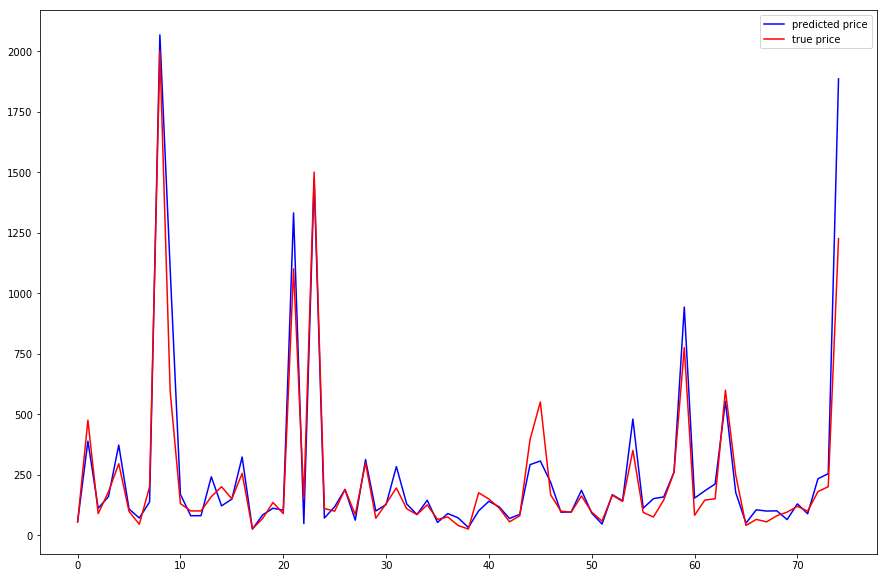

In [59]:
test_predict = rfr_tuned.predict(X_test)

fig, ax = plt.subplots(figsize=(15,10))
ax.plot(range(len(test_predict[:75])),test_predict[:75], color = 'blue')
ax.plot(range(len(y_test[:75])),y_test[:75], color = 'red')

#ax.plot(y_test, y_test, color = 'red')
ax.legend(('predicted price', 'true price'),loc='upper right')
plt.show()

# Question 2: What are the most important factors in determaing the price?
We can get the important factors from the grid search I did earlier in tuning the parameters for the model.

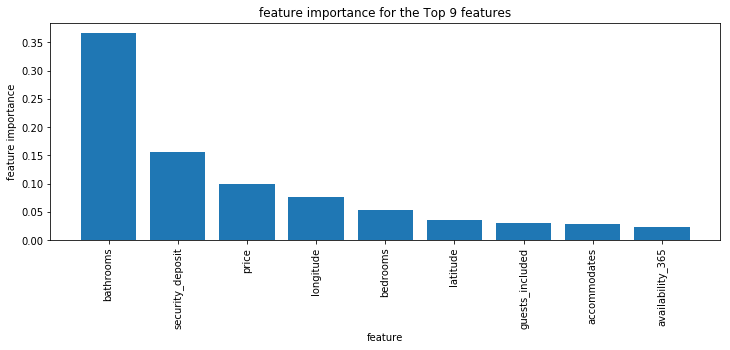

In [60]:
feature_importances_ = gbr_tuned.best_estimator_.feature_importances_
features = sorted(zip(feature_importances_, listings.columns), reverse=True)
attribute = []
coefficient = []
for feature in features:
    attribute.append(feature[1]) 
    coefficient.append(feature[0])
plt.figure(figsize=(12,4))
plt.bar(attribute[:9], height=coefficient[:9])
plt.xticks(rotation=90)
plt.xlabel('feature')
plt.ylabel('feature importance')
plt.title('feature importance for the Top 9 features')
plt.show()

I looks like that the number of bathrooms is a crucial factor, and that seems logically correct. Another important and interesting factor is the security deposit. Location, which we can get from the longitude and latitude, are two less important factores than the two mentioned earlier. 

# Question 3: When is the most booked?

Here, I will be working with the 'calender' data. I already cleaned the data and stored it in the variable 'unavailable_calendar'.

I will group the number of unavailable listings on daily basis.

In [61]:
days = unavailable_calendar.groupby('date')['available'].count()
days

date
2018-05-09     2271
2018-05-10    29750
2018-05-11    30911
2018-05-12    29309
2018-05-13    25950
2018-05-14    24468
2018-05-15    23970
2018-05-16    24008
2018-05-17    24379
2018-05-18    25725
2018-05-19    25939
2018-05-20    23638
2018-05-21    22434
2018-05-22    22065
2018-05-23    22135
2018-05-24    22739
2018-05-25    24262
2018-05-26    24902
2018-05-27    23693
2018-05-28    21382
2018-05-29    20441
2018-05-30    20372
2018-05-31    20724
2018-06-01    21342
2018-06-02    21411
2018-06-03    20350
2018-06-04    19745
2018-06-05    19495
2018-06-06    19581
2018-06-07    20225
              ...  
2019-04-11    23586
2019-04-12    23585
2019-04-13    23592
2019-04-14    23592
2019-04-15    23587
2019-04-16    23581
2019-04-17    23580
2019-04-18    23577
2019-04-19    23571
2019-04-20    23568
2019-04-21    23568
2019-04-22    23567
2019-04-23    23568
2019-04-24    23562
2019-04-25    23560
2019-04-26    23563
2019-04-27    23556
2019-04-28    23552
2019-04-29    2

Sorrting that list will give us the bussiest days 

In [62]:
days.sort_values(ascending=False).head(30)

date
2018-05-11    30911
2018-05-10    29750
2018-05-12    29309
2018-05-13    25950
2018-05-19    25939
2018-05-18    25725
2018-05-26    24902
2018-05-14    24468
2018-05-17    24379
2018-05-25    24262
2018-05-16    24008
2018-05-15    23970
2019-02-06    23709
2019-02-17    23708
2019-02-05    23707
2019-02-07    23704
2019-02-08    23703
2019-02-16    23700
2019-02-09    23698
2019-02-12    23698
2019-02-10    23695
2019-02-15    23694
2019-02-18    23694
2019-02-11    23693
2019-02-04    23693
2018-05-27    23693
2019-02-19    23693
2019-02-14    23691
2019-02-20    23690
2019-02-13    23689
Name: available, dtype: int64

It looks like that the second and third weeks of May were the busiest days in Los Angeles

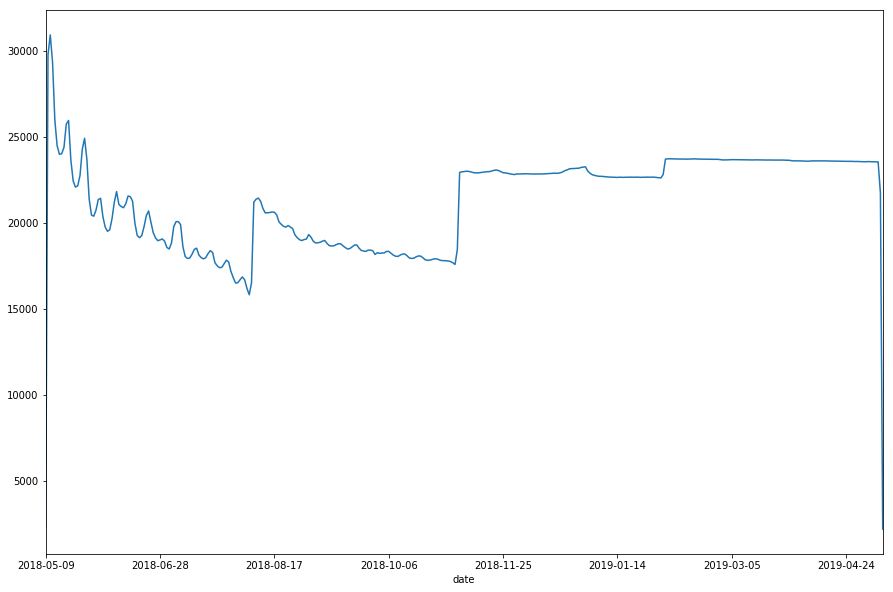

In [63]:
days.plot(figsize=(15,10))

In [64]:
print(GradientBoostingRegressor())

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)
